In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
labels = ['UK', 'USA', 'GER', 'JAP', 'FRA']
age_men = [40, 35, 45, 53, 28]
age_women = [35, 32, 48, 48, 31]

In [26]:
df = pd.DataFrame(list(zip(labels, age_men, age_women)), columns=['labels','Men', 'Women'])
df = df.set_index('labels')

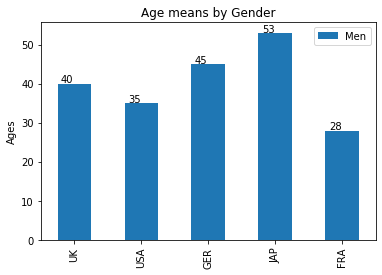

In [32]:
ax=df[['Men']].plot.bar()
plt.title('Age means by Gender')
plt.xlabel('')
plt.ylabel('Ages')
plt.legend();
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+0.25))

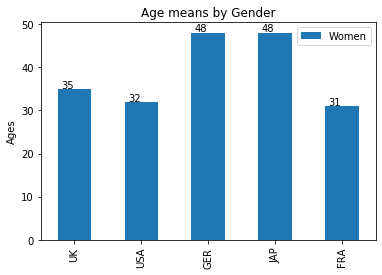

In [33]:
ax=df[['Women']].plot.bar()
plt.title('Age means by Gender')
plt.xlabel('')
plt.ylabel('Ages')
plt.legend();
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+0.25))

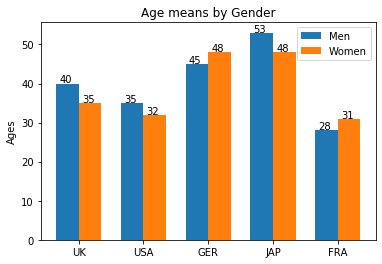

In [43]:
x = np.arange(len(labels)) 
width = 0.35 
fig, ax = plt.subplots()
ax.bar(x - width/2, age_men, width, label='Men')
ax.bar(x + width/2, age_women, width, label='Women')

ax.set_ylabel('Ages')
ax.set_title('Age means by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+0.25))


In [44]:
Json1 = [{'name': 'JOHN', 'age': 27}, {'name': 'HENRY2', 'age': 14}] 

Json2 = { 1:{'name': 'vikash', 'age': 27}, 2:{'name': 'Satyam', 'age': 14} }

data = [{'id': 1, 'name': "Cole Volk", 'fitness': {'height': 130, 'weight': 60}}, {'name': "Mose Reg", 'fitness': {'height': 130, 'weight': 60}}, {'id': 2, 'name': 'Faye Raker', 'fitness': {'height': 130, 'weight': 60}}]

In [45]:
pd.json_normalize(Json1)

,name,age
0,JOHN,27
1,HENRY2,14


In [47]:
df = pd.DataFrame.from_dict(Json2, orient='index')
df.reset_index(level=0, inplace=True)

In [48]:
df

,index,name,age
0,1,vikash,27
1,2,Satyam,14


In [51]:
pd.json_normalize(data)

,id,name,fitness.height,fitness.weight
0,1.0,Cole Volk,130,60
1,NaN,Mose Reg,130,60
2,2.0,Faye Raker,130,60


In [52]:
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [55]:
df=pd.DataFrame(exam_data, index=labels)

In [69]:
df.loc[['b','d','f','g'],['score', 'qualify']]

,score,qualify
b,9.0,no
d,NaN,no
f,20.0,yes
g,14.5,yes


In [72]:
print("number of row ", df.shape[0])

number of columns  10


In [73]:
print("number of columns ", df.shape[1])

number of columns  4


In [90]:
df.isna().sum()

name        0
score       2
attempts    0
qualify     0
dtype: int64

In [91]:
df[df['score'].isna()]

,name,score,attempts,qualify
d,James,NaN,3,no
h,Laura,NaN,1,no


In [93]:
df[(df['score']>=15) & (df['score']<=20)]

,name,score,attempts,qualify
c,Katherine,16.5,2,yes
f,Michael,20.0,3,yes
j,Jonas,19.0,1,yes


In [94]:
df[(df['attempts']<2) & (df['score']>=15)]

,name,score,attempts,qualify
j,Jonas,19.0,1,yes


In [95]:
df['attempts'].sum()

19

In [99]:
df['new'] = ['k' for i in range(len(df['attempts']))]

In [103]:
df.drop(columns='new', axis=1,inplace=True)

In [104]:
df.loc['k'] = [1, 'Suresh', 'yes', 15.5]

In [105]:
df

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9,3,no
c,Katherine,16.5,2,yes
d,James,NaN,3,no
e,Emily,9,2,no
f,Michael,20,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8,2,no
j,Jonas,19,1,yes


In [106]:
df.drop('k', inplace=True)

In [107]:
df

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9,3,no
c,Katherine,16.5,2,yes
d,James,NaN,3,no
e,Emily,9,2,no
f,Michael,20,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8,2,no
j,Jonas,19,1,yes


In [112]:
df.sort_values(by=['name', 'score'], ascending=[True, False])

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9,3,no
e,Emily,9,2,no
d,James,NaN,3,no
j,Jonas,19,1,yes
c,Katherine,16.5,2,yes
i,Kevin,8,2,no
h,Laura,NaN,1,no
g,Matthew,14.5,1,yes
f,Michael,20,3,yes


In [116]:
def replace(x):
    if x=='yes':
        return True
    else:
        return False
df['qualify'] = df['qualify'].apply(replace)

In [117]:
df

,name,score,attempts,qualify
a,Anastasia,12.5,1,True
b,Dima,9,3,False
c,Katherine,16.5,2,True
d,James,NaN,3,False
e,Emily,9,2,False
f,Michael,20,3,True
g,Matthew,14.5,1,True
h,Laura,NaN,1,False
i,Kevin,8,2,False
j,Jonas,19,1,True
